In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
pd.options.display.max_rows = 30
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
#Importamos la base de datos
properati = pd.read_csv("properati.csv")

In [3]:
#Revisamos la informacion general de la base de datos
properati.info()
properati.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [4]:
#Descripcion de las columnas del dataframe
print(properati.columns)
print("Cantidad de datos faltantes")
print(properati.isnull().sum())

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')
Cantidad de datos faltantes
Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_cu

In [5]:
#Descripcion variable "operation"
properati.operation.unique()
#Todas las filas en "operation" son ventas

array(['sell'], dtype=object)

In [6]:
#Descripcion variable 'property_type'
properati[['property_type',"operation"]].groupby('property_type').count()


,operation
property_type,
PH,5751
apartment,71065
house,40268
store,4136


In [7]:
#Descripcion variable 'place_name'
print(properati[["place_name","operation"]].groupby("place_name").count().sort_values("operation"))
#Desigualdad en datos, modificacion necesaria
#Como solo existen 23 casos en los que no existe informacion sobre el "place_name", 
#es factible que se puedan encontrar y rellenar a mano con otra parte de la informacion
#por ejemplo la variable place_with_parents_name

                     operation
place_name                    
Álvarez                      1
Olivera                      1
Obispo Trejo                 1
Calmayo                      1
Nueve de Julio               1
Nelson                       1
Campo Grande                 1
Navarro                      1
Murphy                       1
Capilla del Rosario          1
Monje                        1
Mi Refugio                   1
Mi Granja                    1
Mayor Drummond               1
Materno                      1
...                        ...
Flores                    1354
Lomas de Zamora           1529
Recoleta                  1547
Olivos                    1590
Villa Urquiza             1632
Pilar                     2228
Caballito                 2273
La Plata                  2534
Palermo                   2885
Belgrano                  2992
Nordelta                  3315
Tigre                     3324
Mar del Plata             6534
Rosario                   8504
Córdoba 

In [8]:
#Descripcion variable 'place_with_parent_names'
print(properati[['place_with_parent_names',"operation"]].groupby('place_with_parent_names').count().sort_values("operation"))
#Desigualdad en datos, modificacion necesaria


                                                    operation
place_with_parent_names                                      
|Argentina|Salta|La Silleta|                                1
|Argentina|Buenos Aires Interior|Nueve de Julio|            1
|Argentina|Buenos Aires Interior|Olavarría|Rocha|           1
|Argentina|Buenos Aires Interior|Olavarría|Sier...          1
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Barri...          1
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Barri...          1
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Barri...          1
|Argentina|Buenos Aires Interior|Navarro|Navarro|           1
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Barri...          1
|Argentina|Buenos Aires Interior|Pergamino|                 1
|Argentina|Buenos Aires Interior|Ramallo|Ramallo|           1
|Argentina|Buenos Aires Interior|Rancagua|Ranca...          1
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre| los ...          1
|Argentina|Santa Fe|Serodino|                               1
|Argenti

In [9]:
#Descripcion variable "country_name"
properati.country_name.unique()
#Todas las filas en "country_name" son "Argentina"

array(['Argentina'], dtype=object)

In [10]:
#Descripcion variable "currency"
print(properati[["currency","price"]].groupby("currency").count())
#Desigualdad en datos, modificacion necesaria

          price
currency       
ARS       13219
PEN           2
USD       87587
UYU           1


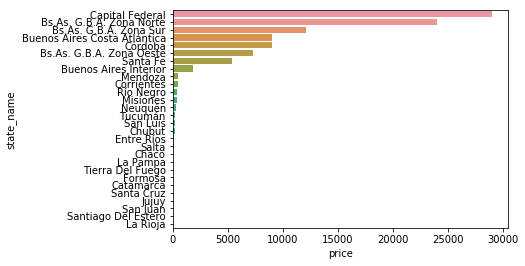

In [11]:
#Descripcion variable 'state_name'
y = properati[['state_name','price']].groupby('state_name').count().sort_values(by="price",ascending=False)
sns.barplot(y.price,y.index)
#Desigualdad en datos, modificacion necesaria

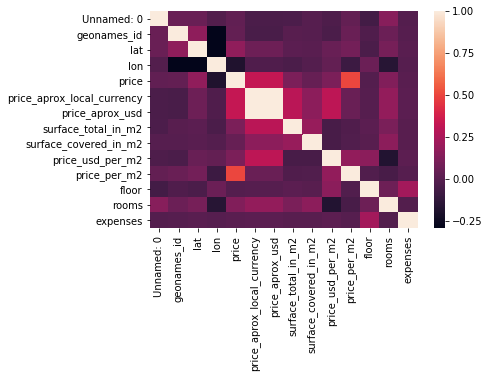

In [16]:
#Hacemos un heatmap primero con todos los elementos
#y otro luego quedandonos con los que no tienen ningun tipo de elemento faltante
sns.heatmap(properati.corr());

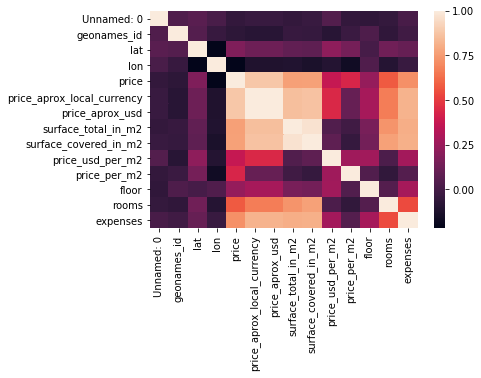

In [13]:
sns.heatmap(properati.dropna().corr());

In [17]:
properati.geonames_id
       

0         3430787.0
1         3432039.0
2         3430787.0
3         3431333.0
4         3435548.0
5         3433657.0
6         3430511.0
7         3436077.0
8         3436077.0
9         3838574.0
10        3860259.0
11              NaN
12        3430813.0
13        3430234.0
14        3430234.0
            ...    
121205    3860255.0
121206    3860255.0
121207    3434130.0
121208    3434130.0
121209    3436077.0
121210    3430813.0
121211    3436508.0
121212    3436508.0
121213    3430813.0
121214    3428983.0
121215    3436077.0
121216    3436080.0
121217    3433775.0
121218          NaN
121219    3433955.0
Name: geonames_id, Length: 121220, dtype: float64

In [ ]:
'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'